In [20]:
import json
import pandas as pd  
import matplotlib.pyplot as plt


In [3]:
content = ""
with open("output.txt", "r") as file:
    content = file.read()


In [8]:
data_string_fixed = content.replace("'", '"')

In [11]:
lst = json.loads(data_string_fixed)

In [17]:
df_trades = pd.DataFrame(lst)
df_trades

,trade_id,product_id,price,size,time,side,exchange,bid,ask
0,610378394,ETH-USD,2693.31,0.00266163,2025-02-15T23:04:16.929545Z,SELL,,,
1,610378498,ETH-USD,2693.07,0.00329429,2025-02-15T23:04:31.279857Z,SELL,,,
2,610378533,ETH-USD,2693.89,0.00324313,2025-02-15T23:04:46.953075Z,SELL,,,
3,610378584,ETH-USD,2693.66,0.00229312,2025-02-15T23:05:01.536506Z,SELL,,,
4,610378657,ETH-USD,2693.98,0.00053698,2025-02-15T23:05:16.783522Z,SELL,,,
...,...,...,...,...,...,...,...,...,...
141312,622994413,ETH-USD,1912.71,0.00335126,2025-03-13T00:24:19.882572Z,BUY,,,
141313,622994457,ETH-USD,1912.02,0.02637,2025-03-13T00:24:34.173855Z,BUY,,,
141314,622994502,ETH-USD,1911.52,0.00522755,2025-03-13T00:24:50.744690Z,SELL,,,
141315,622994556,ETH-USD,1911.41,0.00258925,2025-03-13T00:25:06.144852Z,SELL,,,


/var/folders/1f/5lhk7sb97rz53v7gk1vkcjkr0000gn/T/ipykernel_62259/3006657511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')


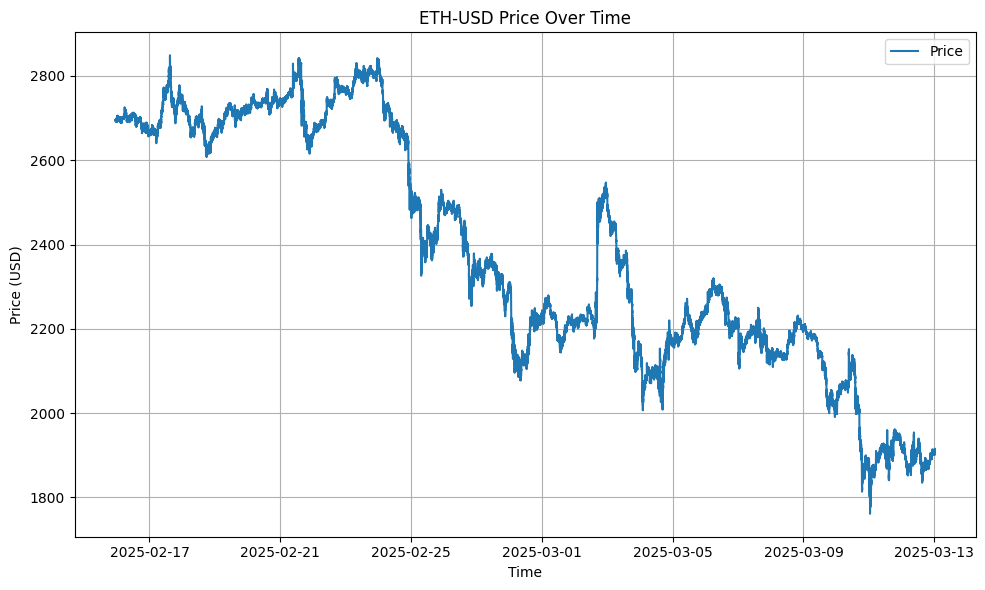

In [21]:
# Convert 'time' to datetime, coercing errors
df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Drop rows where 'time' is NaT (invalid date)
df_trades = df_trades.dropna(subset=['time'])

# Convert 'price' column to numeric
df_trades['price'] = pd.to_numeric(df_trades['price'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_trades['time'], df_trades['price'], linestyle='-', label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('ETH-USD Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
df_trades.to_csv('recent_eth_prices.csv')